# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# 2. Loading Dataset

In [2]:
# we are reading the modified sheet
df = pd.read_excel('satisfaction-hosp-general2016.xls', sheet_name='modified')
df

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,1.0,נקבה,1,3,1.0,3,1,1.0,5.0,...,99,99,3,1,6,1.0,NaN,66,1.0,1
1,600002,1.0,נקבה,2,3,0.0,3,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,1.0,זכר,2,3,1.0,0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,1.0,נקבה,2,3,0.0,1,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,1.0,זכר,2,3,0.0,1,1,0.0,NaN,...,2,1,3,7,6,1.0,1.0,59,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,2.7,זכר,2,2,1.0,1,1,1.0,5.0,...,2,4,3,2,1,1.0,NaN,78,1.0,1
11095,611096,2.7,זכר,3,2,0.0,1,0,0.0,2.0,...,1,4,2,2,1,1.0,NaN,62,3.0,1
11096,611097,2.7,נקבה,2,2,1.0,0,1,0.0,3.0,...,3,4,3,2,1,0.0,0.0,84,3.0,1
11097,611098,2.7,נקבה,2,2,1.0,3,1,1.0,5.0,...,2,4,3,1,1,1.0,1.0,80,1.0,1


# 3. Clean and Transform Data

### Task 1. Dealing with Missing values

In [3]:
#displaying all missing values in each column
df.isna().sum()

id                    0
code_hospital         0
Gender                0
Code_ward             0
SIZE_new              0
Miyun_or_Electiv     26
CHOICE                0
corridor1             0
CHRONIC_2           252
HEALTH_STATUS       228
Q3                    0
Q31                   0
Q4                    0
Q5                    0
Q6                    0
Q7                    0
Q8                    0
Q9                    0
Q10                   0
Q11                   0
Q12                   0
Q13                   0
Q14                   0
Q15                   0
Q16                   0
Q17                   0
Q18                   0
Q19                   0
Q20                   0
Q21_2016              0
Q22                   0
Q23                   0
Q24                   0
Q25                   0
Q26                   0
Q27                   0
Q28                   0
Q29                   0
Q30                   0
Q33                   0
Q34                   0
Q36             

The columns `Miyun_or_Electiv`, `CHRONIC_2`, `HEALTH_STATUS`, `Q3_G`, `q31_G`, `KUPAT_HOLIM` have missing values. 

**Fill Missing Value**

In [4]:
# Miyun_or_Electiv : we will fill them with 0's .
df['Miyun_or_Electiv'].fillna(0, inplace=True)

# CHRONIC_2 : Here we will fill with 0's as well.
df['CHRONIC_2'].fillna(0, inplace=True)

# HEALTH_STATUS: The values corresponding to this column are ints between 1 to 5 describing the patient's general health status. 
# We will fill with the most frequent value.
df['HEALTH_STATUS'].fillna(df['HEALTH_STATUS'].mode()[0], inplace=True)

# Q3_G: This column is about if they were satisfied in general with the treatment in the hospital. 
        # 1 indicated they are and a 0 if 'else', we will fill with 0's.
df['Q3_G'].fillna(0, inplace=True)

# q31_G : if they are willing to recommend the hospital as a good place to be hospitalized. 
          # 1 means yes and the 0's are 'else'. We wil fill with 0's. 
df['q31_G'].fillna(0, inplace=True)

# KUPAT_HOLIM : it's basically the HMO in Israel. 
            # 1-4 list 4 names of the HMO's in Israel with 5 being 'else'. We will fill with 5.
df['KUPAT_HOLIM'].fillna(5, inplace=True)

In [5]:
df.isna().sum()

id                  0
code_hospital       0
Gender              0
Code_ward           0
SIZE_new            0
Miyun_or_Electiv    0
CHOICE              0
corridor1           0
CHRONIC_2           0
HEALTH_STATUS       0
Q3                  0
Q31                 0
Q4                  0
Q5                  0
Q6                  0
Q7                  0
Q8                  0
Q9                  0
Q10                 0
Q11                 0
Q12                 0
Q13                 0
Q14                 0
Q15                 0
Q16                 0
Q17                 0
Q18                 0
Q19                 0
Q20                 0
Q21_2016            0
Q22                 0
Q23                 0
Q24                 0
Q25                 0
Q26                 0
Q27                 0
Q28                 0
Q29                 0
Q30                 0
Q33                 0
Q34                 0
Q36                 0
Q37                 0
Q3_G                0
q31_G               0
AGE_TODAY 

### Task 2. Checking Unique value

In [6]:
for col in df.columns:
    print(col, df[col].unique())

id [600001 600002 600003 ... 611097 611098 611099]
code_hospital [ 1.   2.   3.   4.   5.   6.   8.   9.  10.  11.  12.  13.  14.  15.
 16.  17.  19.  20.  23.  24.   2.7  7.  26. ]
Gender ['נקבה' 'זכר']
Code_ward [1 2 3]
SIZE_new [3 2 1]
Miyun_or_Electiv [1. 0.]
CHOICE [3 0 1]
corridor1 [1 0]
CHRONIC_2 [1. 0.]
HEALTH_STATUS [5. 2. 4. 3. 1.]
Q3 [10  1  9  8  5  7  3  6 99  4  2]
Q31 [99 10  1  8  5  3  9  7  4  6  2]
Q4 [ 1 99  5  3  2 98  4]
Q5 [ 1  5  3  2  4 99]
Q6 [ 2  4  1  3  5 99]
Q7 [ 2  4  1  3 99  5]
Q8 [ 2  4  1  5  3 99  6]
Q9 [ 1  2  3  5 99  4]
Q10 [ 1  3  2  4 99  5]
Q11 [ 1  2  3  4  5 99]
Q12 [ 1  2  3  5  4  6 99]
Q13 [ 1  2  3  5  6  4 99]
Q14 [ 1  2  3  5 99  4]
Q15 [ 1  3  2 99  5  4]
Q16 [ 1  2  4  3 98  5 99]
Q17 [ 1  3 99  2  5  4]
Q18 [99  1  4  5 98  2 97  3]
Q19 [99  1  3  5  6  2  4]
Q20 [99  1  2  4  3]
Q21_2016 [ 1  3  2 99  4  5]
Q22 [ 1  3  2  5  4 99]
Q23 [ 1  4  2 99  3  5]
Q24 [99  1  4  2  3  5]
Q25 [99  1  4  2  5  3  6]
Q26 [99  1  3  2  4]
Q27 [99

We notice the following issues:
1. There is 2.7 in `code_hospital` which should have been 27.
2. The available options in `CHOICES` column should be 1 and 0, but there is 3 in that column.

In [7]:
# changing 2.7 in code_hospital to 27

#df.loc(row, col)
df.loc[df['code_hospital'] == 2.70, 'code_hospital'] = 27
df['code_hospital'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 19., 20., 23., 24., 27.,  7., 26.])

In [8]:
# ffilling value of 3 in column CHOICE into 0 and 1 using the mask method
import numpy as np
df['CHOICE'] = df['CHOICE'].mask(df['CHOICE'].isin([3]),df['CHOICE'].replace(3,np.nan).ffill())

df['CHOICE'].value_counts()

1.0    6838
0.0    4259
Name: CHOICE, dtype: int64

In [9]:
df

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,1.0,נקבה,1,3,1.0,NaN,1,1.0,5.0,...,99,99,3,1,6,1.0,0.0,66,1.0,1
1,600002,1.0,נקבה,2,3,0.0,NaN,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,1.0,זכר,2,3,1.0,0.0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,1.0,נקבה,2,3,0.0,1.0,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,1.0,זכר,2,3,0.0,1.0,1,0.0,4.0,...,2,1,3,7,6,1.0,1.0,59,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,27.0,זכר,2,2,1.0,1.0,1,1.0,5.0,...,2,4,3,2,1,1.0,0.0,78,1.0,1
11095,611096,27.0,זכר,3,2,0.0,1.0,0,0.0,2.0,...,1,4,2,2,1,1.0,0.0,62,3.0,1
11096,611097,27.0,נקבה,2,2,1.0,0.0,1,0.0,3.0,...,3,4,3,2,1,0.0,0.0,84,3.0,1
11097,611098,27.0,נקבה,2,2,1.0,0.0,1,1.0,5.0,...,2,4,3,1,1,1.0,1.0,80,1.0,1


### Task 3. Assigning values to appropriate hospital names in code_hospital column

In [10]:
conditions = [df['code_hospital'].eq(1),df['code_hospital'].eq(2), df['code_hospital'].eq(3), df['code_hospital'].eq(4),
            df['code_hospital'].eq(5), df['code_hospital'].eq(6),df['code_hospital'].eq(7), df['code_hospital'].eq(8),
            df['code_hospital'].eq(9), df['code_hospital'].eq(10), df['code_hospital'].eq(11), df['code_hospital'].eq(12),
             df['code_hospital'].eq(13),df['code_hospital'].eq(14), df['code_hospital'].eq(15), df['code_hospital'].eq(16),
            df['code_hospital'].eq(17), df['code_hospital'].eq(18),df['code_hospital'].eq(19), df['code_hospital'].eq(20),
            df['code_hospital'].eq(21), df['code_hospital'].eq(22), df['code_hospital'].eq(23),df['code_hospital'].eq(24),
            df['code_hospital'].eq(25), df['code_hospital'].eq(26), df['code_hospital'].eq(27), df['code_hospital'].eq(28)]
            
choices = ['Sheba', 'Rambam', 'Wolfson', 'Ziv', 'Hillel Yaffe', 'Galilee', 'Brazilai', 'Baruch Padeh', 'Ichilov', 'Bnai Zion', 'Beilinson', 'Soroka', 'Meir', 'Kaplan', 'Emek',
            'Carmel','Hasharon', 'Yoseftal', 'Hadassah-Ein Karem', 'Hadassah-Mount Scopus', 'Nazareth Hospital EMMS', 'Holy Family', 'Shaare Zedek', 'Laniado',
            'Augusta Victoria', 'Mayanei HaYeshua', 'Shamir', 'Saint Vincent De Paul']

df['code_hospital'] = np.select(conditions, choices, default=0)

In [11]:
df

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
0,600001,Sheba,נקבה,1,3,1.0,NaN,1,1.0,5.0,...,99,99,3,1,6,1.0,0.0,66,1.0,1
1,600002,Sheba,נקבה,2,3,0.0,NaN,0,1.0,5.0,...,2,99,1,2,6,1.0,1.0,69,4.0,1
2,600003,Sheba,זכר,2,3,1.0,0.0,0,1.0,5.0,...,5,3,1,6,6,0.0,0.0,26,1.0,1
3,600004,Sheba,נקבה,2,3,0.0,1.0,1,1.0,2.0,...,1,3,3,2,6,1.0,1.0,70,2.0,1
4,600005,Sheba,זכר,2,3,0.0,1.0,1,0.0,4.0,...,2,1,3,7,6,1.0,1.0,59,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,Shamir,זכר,2,2,1.0,1.0,1,1.0,5.0,...,2,4,3,2,1,1.0,0.0,78,1.0,1
11095,611096,Shamir,זכר,3,2,0.0,1.0,0,0.0,2.0,...,1,4,2,2,1,1.0,0.0,62,3.0,1
11096,611097,Shamir,נקבה,2,2,1.0,0.0,1,0.0,3.0,...,3,4,3,2,1,0.0,0.0,84,3.0,1
11097,611098,Shamir,נקבה,2,2,1.0,0.0,1,1.0,5.0,...,2,4,3,1,1,1.0,1.0,80,1.0,1


### Task 4. Changing values of gender

In [12]:
#eq is equal to
conditions = [df['Gender'].eq('זכר'), df['Gender'].eq('נקבה')]
choices = ['M', 'F']
df['Gender'] = np.select(conditions, choices, default=0)
df.sample(10)

,id,code_hospital,Gender,Code_ward,SIZE_new,Miyun_or_Electiv,CHOICE,corridor1,CHRONIC_2,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,baalut
2558,602559,Hadassah-Ein Karem,F,1,2,1.0,0.0,1,1.0,2.0,...,2,3,3,2,2,1.0,1.0,55,1.0,3
723,600724,Ziv,F,1,1,1.0,0.0,1,1.0,5.0,...,1,4,3,2,3,1.0,1.0,66,3.0,1
5921,605922,Ichilov,F,2,3,1.0,1.0,1,0.0,1.0,...,1,1,3,2,1,0.0,0.0,39,1.0,1
7213,607214,Meir,F,1,2,0.0,0.0,1,1.0,2.0,...,2,1,3,1,1,1.0,1.0,76,1.0,2
1113,601114,Rambam,M,2,3,1.0,1.0,0,1.0,4.0,...,2,3,2,1,2,1.0,0.0,55,1.0,1
4154,604155,Ziv,F,3,1,1.0,0.0,1,0.0,3.0,...,1,1,3,1,1,0.0,0.0,64,1.0,1
3394,603395,Rambam,M,1,3,1.0,1.0,1,1.0,3.0,...,1,1,3,2,1,1.0,1.0,73,4.0,1
6847,606848,Soroka,M,1,3,1.0,1.0,1,1.0,2.0,...,1,1,3,2,1,1.0,0.0,38,1.0,2
5420,605421,Baruch Padeh,F,2,1,0.0,1.0,1,0.0,3.0,...,2,1,3,2,1,1.0,1.0,69,1.0,1
10743,610744,Shamir,F,1,2,1.0,1.0,1,0.0,4.0,...,1,1,3,2,1,0.0,0.0,64,1.0,1


### Task 5. Making Changes to other columns respectively

In [13]:
conditions = [df['Code_ward'].eq(1), df['Code_ward'].eq(2), df['Code_ward'].eq(3)]
choices = ['Internal', 'Surgical', 'Other']
df['Code_ward'] = np.select(conditions, choices, default=0)
df.rename({'Code_ward': 'Ward'}, axis=1, inplace=True)


conditions = [df['SIZE_new'].eq(1), df['SIZE_new'].eq(2), df['SIZE_new'].eq(3)]
choices = ['Small', 'Medium', 'Big']
df['SIZE_new'] = np.select(conditions, choices, default=0)
df.rename({'SIZE_new': 'Hospital_size'}, axis=1, inplace=True)


conditions = [df['Miyun_or_Electiv'].eq(1), df['Miyun_or_Electiv'].eq(0)]
choices = ['Emergency hospitalization', 'Elective hospitalization']
df['Miyun_or_Electiv'] = np.select(conditions, choices, default=0)
df.rename({'Miyun_or_Electiv': 'Emergency_Or_Elective'}, axis=1, inplace=True)


conditions = [df['CHOICE'].eq(1), df['CHOICE'].eq(0)]
choices = ['Yes', 'No']
df['CHOICE'] = np.select(conditions, choices, default=0)
df.rename({'CHOICE': 'Can_Choose_Hosp'}, axis=1, inplace=True)


conditions = [df['corridor1'].eq(1), df['corridor1'].eq(0)]
choices = ['No', 'Yes']
df['corridor1'] = np.select(conditions, choices, default=0)
df.rename({'corridor1': 'Lay_Corridor'}, axis=1, inplace=True)


conditions = [df['CHRONIC_2'].eq(1), df['CHRONIC_2'].eq(0)]
choices = ['Yes', 'No']
df['CHRONIC_2'] = np.select(conditions, choices, default=0)
df.rename({'CHRONIC_2': 'Chronic'}, axis=1, inplace=True)


conditions = [df['HEALTH_STATUS'].eq(1), df['HEALTH_STATUS'].eq(2), df['HEALTH_STATUS'].eq(3), df['HEALTH_STATUS'].eq(4), df['HEALTH_STATUS'].eq(5)]
choices = ['Excellent', 'Very Good', 'Good', 'Reasonable', 'Deficient']
df['HEALTH_STATUS'] = np.select(conditions, choices, default=0)


conditions = [df['KUPAT_HOLIM'].eq(1), df['KUPAT_HOLIM'].eq(2), df['KUPAT_HOLIM'].eq(3), df['KUPAT_HOLIM'].eq(4), df['KUPAT_HOLIM'].eq(5)]
choices = ['Clalit', 'Leumit', 'Meuhedet', 'Maccabi', 'Other']
df['KUPAT_HOLIM'] = np.select(conditions, choices, default=0)


conditions = [df['baalut'].eq(1), df['baalut'].eq(2), df['baalut'].eq(3), df['baalut'].eq(5)]
choices = ['Goverment', 'Clalit', 'Hadassah', 'Public']
df['baalut'] = np.select(conditions, choices, default=0)
df.rename({'baalut': 'Hosp_Ownership'}, axis=1, inplace=True)

In [14]:
df

,id,code_hospital,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Lay_Corridor,Chronic,HEALTH_STATUS,...,Q30,Q33,Q34,Q36,Q37,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
0,600001,Sheba,F,Internal,Big,Emergency hospitalization,0,No,Yes,Deficient,...,99,99,3,1,6,1.0,0.0,66,Clalit,Goverment
1,600002,Sheba,F,Surgical,Big,Elective hospitalization,0,Yes,Yes,Deficient,...,2,99,1,2,6,1.0,1.0,69,Maccabi,Goverment
2,600003,Sheba,M,Surgical,Big,Emergency hospitalization,No,Yes,Yes,Deficient,...,5,3,1,6,6,0.0,0.0,26,Clalit,Goverment
3,600004,Sheba,F,Surgical,Big,Elective hospitalization,Yes,No,Yes,Very Good,...,1,3,3,2,6,1.0,1.0,70,Leumit,Goverment
4,600005,Sheba,M,Surgical,Big,Elective hospitalization,Yes,No,No,Reasonable,...,2,1,3,7,6,1.0,1.0,59,Maccabi,Goverment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,Shamir,M,Surgical,Medium,Emergency hospitalization,Yes,No,Yes,Deficient,...,2,4,3,2,1,1.0,0.0,78,Clalit,Goverment
11095,611096,Shamir,M,Other,Medium,Elective hospitalization,Yes,Yes,No,Very Good,...,1,4,2,2,1,1.0,0.0,62,Meuhedet,Goverment
11096,611097,Shamir,F,Surgical,Medium,Emergency hospitalization,No,No,No,Good,...,3,4,3,2,1,0.0,0.0,84,Meuhedet,Goverment
11097,611098,Shamir,F,Surgical,Medium,Emergency hospitalization,No,No,Yes,Deficient,...,2,4,3,1,1,1.0,1.0,80,Clalit,Goverment


### Task 6. Changing the column name for Q named columns

In [15]:
# Q3 is basically the satisfaction score from 1 to 10. No need for masking here. We will only change the column name:
df.rename({'Q3': 'sat_score'}, axis=1, inplace=True)


# Q31 is if they would recommend for other to be hospitalized in that hospital. No need for masking here. We will only change the column name:
df.rename({'Q31': 'would_recommend'}, axis=1, inplace=True)

### Mapping to appropriate names for entries in Q named columns

In [16]:
group = ['Q5', 'Q6', 'Q7','Q9', 'Q10', 'Q11','Q14', 'Q15','Q17','Q21_2016', 'Q22', 'Q23', 'Q24','Q27', 'Q28']

for column in group:
    conditions = [df[column].eq(1), df[column].eq(2), df[column].eq(3), df[column].eq(4), df[column].eq(5), df[column].eq(99)]
    choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Do not know / irrelevant']
    df[column] = np.select(conditions, choices, default=0)



conditions = [df['Q4'].eq(1), df['Q4'].eq(2), df['Q4'].eq(3), df['Q4'].eq(4), df['Q4'].eq(5), df['Q4'].eq(98), df['Q4'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Was not emergency hospitalization', 'Do not know / irrelevant']
df['Q4'] = np.select(conditions, choices, default=0)

conditions = [df['Q8'].eq(1), df['Q8'].eq(2), df['Q8'].eq(3), df['Q8'].eq(4), df['Q8'].eq(5), df['Q8'].eq(6), df['Q8'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know / irrelevant']
df['Q8'] = np.select(conditions, choices, default=0)

conditions = [df['Q12'].eq(1), df['Q12'].eq(2), df['Q12'].eq(3), df['Q12'].eq(4), df['Q12'].eq(5), df['Q12'].eq(6), df['Q12'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know / irrelevant']
df['Q12'] = np.select(conditions, choices, default=0)

conditions = [df['Q13'].eq(1), df['Q13'].eq(2), df['Q13'].eq(3), df['Q13'].eq(4), df['Q13'].eq(5), df['Q13'].eq(6), df['Q13'].eq(98), df['Q13'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "don't know/couldn't know", "don't know/couldn't know", 'irrelevant']
df['Q13'] = np.select(conditions, choices, default=0)

conditions = [df['Q16'].eq(1), df['Q16'].eq(2), df['Q16'].eq(3), df['Q16'].eq(4), df['Q16'].eq(5), df['Q16'].eq(98), df['Q16'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "didn't suffer / didn't want to get treatment for pain", "don't know"]
df['Q16'] = np.select(conditions, choices, default=0)

conditions = [df['Q18'].eq(1), df['Q18'].eq(2), df['Q18'].eq(3), df['Q18'].eq(4), df['Q18'].eq(5), df['Q18'].eq(97), df['Q18'].eq(98), df['Q18'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Not interested in being shared with the information', 'My medical condition did not allow for sharing', "Don't know"]
df['Q18'] = np.select(conditions, choices, default=0)

conditions = [df['Q19'].eq(1), df['Q19'].eq(2), df['Q19'].eq(3), df['Q19'].eq(4), df['Q19'].eq(5), df['Q19'].eq(6), df['Q19'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'There were no alternatives', "Don't know"]
df['Q19'] = np.select(conditions, choices, default=0)

conditions = [df['Q20'].eq(1), df['Q20'].eq(2), df['Q20'].eq(3), df['Q20'].eq(4), df['Q20'].eq(99)]
choices = ['Always', 'Usually Yes', 'Usually No', 'Never', "Don't know"]
df['Q20'] = np.select(conditions, choices, default=0)

conditions = [df['Q25'].eq(1), df['Q25'].eq(2), df['Q25'].eq(3), df['Q25'].eq(4), df['Q25'].eq(5), df['Q25'].eq(6), df['Q25'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied','Did not receive explanation', 'Do not know']
df['Q25'] = np.select(conditions, choices, default=0)

conditions = [df['Q26'].eq(1), df['Q26'].eq(2), df['Q26'].eq(3), df['Q26'].eq(4), df['Q26'].eq(99)]
choices = ['Always', 'Usually Yes', 'Usually No', 'Never', "Don't know"]
df['Q26'] = np.select(conditions, choices, default=0)

conditions = [df['Q29'].eq(1), df['Q29'].eq(2), df['Q29'].eq(3), df['Q29'].eq(4), df['Q29'].eq(5), df['Q29'].eq(98), df['Q29'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', "Didn't eat the hospital food", "Don't know / irrelevant"]
df['Q29'] = np.select(conditions, choices, default=0)
df.rename({'Q29': 'Hospital_food'}, axis=1, inplace=True)


conditions = [df['Q30'].eq(1), df['Q30'].eq(2), df['Q30'].eq(3), df['Q30'].eq(4), df['Q30'].eq(5), df['Q30'].eq(98), df['Q30'].eq(99)]
choices = ['Very Satisfied', 'Satisfied', 'Neutral', 'Dissatisfied', 'Very Dissatisfied', 'Had no companions', "Don't know"]
df['Q30'] = np.select(conditions, choices, default=0)

conditions = [df['Q33'].eq(1), df['Q33'].eq(2), df['Q33'].eq(3), df['Q33'].eq(4), df['Q33'].eq(5), df['Q33'].eq(6), df['Q33'].eq(99)]
choices = ['Hebrew', 'English', 'Arabic', 'Russian', 'Amharic', 'Other', 'Refused to answer']
df['Q33'] = np.select(conditions, choices, default=0)
df.rename({'Q33': 'Language'}, axis=1, inplace=True)

conditions = [df['Q34'].eq(1), df['Q34'].eq(2), df['Q34'].eq(3)]
choices = ['Entirety', 'Partly', 'At all']
df['Q34'] = np.select(conditions, choices, default=0)
df.rename({'Q34': 'corridor_stay'}, axis=1, inplace=True) # and since we have another column called Lay_Corridor let's drop that one
df.drop('Lay_Corridor', axis=1, inplace=True)

conditions = [df['Q36'].eq(1), df['Q36'].eq(2), df['Q36'].eq(3), df['Q36'].eq(4), df['Q36'].eq(5), df['Q36'].eq(6), df['Q36'].eq(7)]
choices = ['Alone', 'With Family Member', 'Home with a caregiver', 'At Family member', 'Assisted living/nursing home', 'Nursing facility/rehabilitation center', 'Refused to answer']
df['Q36'] = np.select(conditions, choices, default=0)
df.rename({'Q36': 'Recently_lived_with'}, axis=1, inplace=True)

conditions = [df['Q37'].eq(1), df['Q37'].eq(2), df['Q37'].eq(3), df['Q37'].eq(4), df['Q37'].eq(5), df['Q37'].eq(6)]
choices = ['Jewish', 'Muslim', 'Christian', 'Druze', 'Other', 'Refused to answer']
df['Q37'] = np.select(conditions, choices, default=0)
df.rename({'Q37': 'Religion'}, axis=1, inplace=True)

In [17]:
df

,id,code_hospital,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Chronic,HEALTH_STATUS,sat_score,...,Q30,Language,corridor_stay,Recently_lived_with,Religion,Q3_G,q31_G,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
0,600001,Sheba,F,Internal,Big,Emergency hospitalization,0,Yes,Deficient,10,...,Don't know,Refused to answer,At all,Alone,Refused to answer,1.0,0.0,66,Clalit,Goverment
1,600002,Sheba,F,Surgical,Big,Elective hospitalization,0,Yes,Deficient,10,...,Satisfied,Refused to answer,Entirety,With Family Member,Refused to answer,1.0,1.0,69,Maccabi,Goverment
2,600003,Sheba,M,Surgical,Big,Emergency hospitalization,No,Yes,Deficient,1,...,Very Dissatisfied,Arabic,Entirety,Nursing facility/rehabilitation center,Refused to answer,0.0,0.0,26,Clalit,Goverment
3,600004,Sheba,F,Surgical,Big,Elective hospitalization,Yes,Yes,Very Good,10,...,Very Satisfied,Arabic,At all,With Family Member,Refused to answer,1.0,1.0,70,Leumit,Goverment
4,600005,Sheba,M,Surgical,Big,Elective hospitalization,Yes,No,Reasonable,9,...,Satisfied,Hebrew,At all,Refused to answer,Refused to answer,1.0,1.0,59,Maccabi,Goverment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,Shamir,M,Surgical,Medium,Emergency hospitalization,Yes,Yes,Deficient,8,...,Satisfied,Russian,At all,With Family Member,Jewish,1.0,0.0,78,Clalit,Goverment
11095,611096,Shamir,M,Other,Medium,Elective hospitalization,Yes,No,Very Good,9,...,Very Satisfied,Russian,Partly,With Family Member,Jewish,1.0,0.0,62,Meuhedet,Goverment
11096,611097,Shamir,F,Surgical,Medium,Emergency hospitalization,No,No,Good,7,...,Neutral,Russian,At all,With Family Member,Jewish,0.0,0.0,84,Meuhedet,Goverment
11097,611098,Shamir,F,Surgical,Medium,Emergency hospitalization,No,Yes,Deficient,8,...,Satisfied,Russian,At all,Alone,Jewish,1.0,1.0,80,Clalit,Goverment


### Task 7. Dropping columns

In [18]:
# Columns Q3_G and q31_G are redundant , let's drop them:
df.drop('Q3_G', axis=1, inplace=True)
df.drop('q31_G', axis=1, inplace=True)

df.shape

(11099, 45)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     11099 non-null  int64 
 1   code_hospital          11099 non-null  object
 2   Gender                 11099 non-null  object
 3   Ward                   11099 non-null  object
 4   Hospital_size          11099 non-null  object
 5   Emergency_Or_Elective  11099 non-null  object
 6   Can_Choose_Hosp        11099 non-null  object
 7   Chronic                11099 non-null  object
 8   HEALTH_STATUS          11099 non-null  object
 9   sat_score              11099 non-null  int64 
 10  would_recommend        11099 non-null  int64 
 11  Q4                     11099 non-null  object
 12  Q5                     11099 non-null  object
 13  Q6                     11099 non-null  object
 14  Q7                     11099 non-null  object
 15  Q8                 

### Task 8. Renaming some columns and also changing data type

In [20]:
# rename code_hospital to Hospital:
df.rename({'code_hospital': 'HOSPITAL'}, axis=1, inplace=True)

# convert sat_score and would_recommend because they are categorical data: 
df['sat_score'] = df['sat_score'].astype('object')
df['would_recommend'] = df['would_recommend'].astype('object')

In [21]:
df

,id,HOSPITAL,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Chronic,HEALTH_STATUS,sat_score,...,Q28,Hospital_food,Q30,Language,corridor_stay,Recently_lived_with,Religion,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
0,600001,Sheba,F,Internal,Big,Emergency hospitalization,0,Yes,Deficient,10,...,Do not know / irrelevant,Don't know / irrelevant,Don't know,Refused to answer,At all,Alone,Refused to answer,66,Clalit,Goverment
1,600002,Sheba,F,Surgical,Big,Elective hospitalization,0,Yes,Deficient,10,...,Very Satisfied,Neutral,Satisfied,Refused to answer,Entirety,With Family Member,Refused to answer,69,Maccabi,Goverment
2,600003,Sheba,M,Surgical,Big,Emergency hospitalization,No,Yes,Deficient,1,...,Dissatisfied,Dissatisfied,Very Dissatisfied,Arabic,Entirety,Nursing facility/rehabilitation center,Refused to answer,26,Clalit,Goverment
3,600004,Sheba,F,Surgical,Big,Elective hospitalization,Yes,Yes,Very Good,10,...,Very Satisfied,Very Satisfied,Very Satisfied,Arabic,At all,With Family Member,Refused to answer,70,Leumit,Goverment
4,600005,Sheba,M,Surgical,Big,Elective hospitalization,Yes,No,Reasonable,9,...,Satisfied,Didn't eat the hospital food,Satisfied,Hebrew,At all,Refused to answer,Refused to answer,59,Maccabi,Goverment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,Shamir,M,Surgical,Medium,Emergency hospitalization,Yes,Yes,Deficient,8,...,Satisfied,Didn't eat the hospital food,Satisfied,Russian,At all,With Family Member,Jewish,78,Clalit,Goverment
11095,611096,Shamir,M,Other,Medium,Elective hospitalization,Yes,No,Very Good,9,...,Neutral,Satisfied,Very Satisfied,Russian,Partly,With Family Member,Jewish,62,Meuhedet,Goverment
11096,611097,Shamir,F,Surgical,Medium,Emergency hospitalization,No,No,Good,7,...,Satisfied,Didn't eat the hospital food,Neutral,Russian,At all,With Family Member,Jewish,84,Meuhedet,Goverment
11097,611098,Shamir,F,Surgical,Medium,Emergency hospitalization,No,Yes,Deficient,8,...,Satisfied,Satisfied,Satisfied,Russian,At all,Alone,Jewish,80,Clalit,Goverment


# 4. Saving as a excel file

In [22]:
df.to_excel('modified_hosp_data.xlsx')

# 5. Exploratory Data Analysis

In [23]:
# Before continuing let's translate the questions and add in a dataframe so it would be easier for you to follow up:

pd.options.display.max_colwidth = 300


questions = {'Question':
            ['Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15','Q16','Q17', 'Q18', 'Q19','Q20', 'Q21_2016', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q30'],

            'Translation': [
            "If you were hospitalized through the emergency room, to what extent were you satisfied with the care you received?",
            "From the moment you arrived at the ward, to what extent was the admission process conducted efficiently?",
            "During your last hospitalization, to what extent did you feel that the nurses treated you with kindness and respect?",
            "To what extent did the nurses listen to you and address your questions and concerns?",
            "To what extent were the explanations you received during hospitalization from the nurses clear and understandable to you?",
            "During your last hospitalization, to what extent did you feel that the doctors treated you with kindness and respect?",
            "To what extent during the doctors visit did you feel that you were treated personally?",
            "To what extent did the doctors listen to you and address your questions and concerns?",
            "To what extent were the explanations you received during hospitalization from the doctors clear and understandable to you?", 
            "To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?",
            "To what extent were the explanations given to you during the hospitalization initiated by the ward staff?",
            "To what extent did you feel that the department staff worked in coordination and cooperation (among themselves) in everything related to your care? (For example, transferring information from one to another, implementing the doctors' recommendations)",
            "To what extent did you feel that the staff addressed your pain or other symptoms such as nausea or dizziness, and helped you deal with them?",
            "To what extent did you feel that the care team works to maintain your safety to prevent medical errors in cases such as identifying a patient sensitivity to medications, preventing falls, etc.?",
            "To what extent did you feel that you were shared with the therapeutic options, to the extent that you were interested? That is, you were involved in the decisions, and your preferences were taken into account.",
            "To what extent did you feel that additional treatment methods / therapeutic alternatives were presented to you?",
            "During the last hospitalization, did you feel that you knew what the next step in hospital treatment was?",
            "To what extent did you feel that you received an answer to your requests and needs easily and without the need to make an effort?",
            "To what extent did you feel during the hospitalization that you were treated in good hands?",
            "To what extent was the discharge process from the hospital conducted efficiently?",
            "At the time of discharge from the hospital, to what extent did you receive an explanation summarizing your medical problem and the treatment you were given?",
            "To what extent were the explanations and instructions for further treatment clear and understandable to you? This refers to explanations regarding the medical problem for which you were hospitalized, the treatment given to you, unusual symptoms to be aware of and medications you must take.",
            "Were the room and bathroom clean?",
            "To what extent are you satisfied with the conditions in the room where you were hospitalized? (air conditioning, bed, mattress...)",
            "During the hospitalization, to what extent was it quiet at night in your room and in your surroundings?",
            "To what extent were the conditions available to your companions and visitors comfortable and adequate?"]
            }

questions_df = pd.DataFrame(questions)
questions_df

,Question,Translation
0,Q4,"If you were hospitalized through the emergency room, to what extent were you satisfied with the care you received?"
1,Q5,"From the moment you arrived at the ward, to what extent was the admission process conducted efficiently?"
2,Q6,"During your last hospitalization, to what extent did you feel that the nurses treated you with kindness and respect?"
3,Q7,To what extent did the nurses listen to you and address your questions and concerns?
4,Q8,To what extent were the explanations you received during hospitalization from the nurses clear and understandable to you?
5,Q9,"During your last hospitalization, to what extent did you feel that the doctors treated you with kindness and respect?"
6,Q10,To what extent during the doctors visit did you feel that you were treated personally?
7,Q11,To what extent did the doctors listen to you and address your questions and concerns?
8,Q12,To what extent were the explanations you received during hospitalization from the doctors clear and understandable to you?
9,Q13,To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?


In [25]:
df

,id,HOSPITAL,Gender,Ward,Hospital_size,Emergency_Or_Elective,Can_Choose_Hosp,Chronic,HEALTH_STATUS,sat_score,...,Q28,Hospital_food,Q30,Language,corridor_stay,Recently_lived_with,Religion,AGE_TODAY,KUPAT_HOLIM,Hosp_Ownership
0,600001,Sheba,F,Internal,Big,Emergency hospitalization,0,Yes,Deficient,10,...,Do not know / irrelevant,Don't know / irrelevant,Don't know,Refused to answer,At all,Alone,Refused to answer,66,Clalit,Goverment
1,600002,Sheba,F,Surgical,Big,Elective hospitalization,0,Yes,Deficient,10,...,Very Satisfied,Neutral,Satisfied,Refused to answer,Entirety,With Family Member,Refused to answer,69,Maccabi,Goverment
2,600003,Sheba,M,Surgical,Big,Emergency hospitalization,No,Yes,Deficient,1,...,Dissatisfied,Dissatisfied,Very Dissatisfied,Arabic,Entirety,Nursing facility/rehabilitation center,Refused to answer,26,Clalit,Goverment
3,600004,Sheba,F,Surgical,Big,Elective hospitalization,Yes,Yes,Very Good,10,...,Very Satisfied,Very Satisfied,Very Satisfied,Arabic,At all,With Family Member,Refused to answer,70,Leumit,Goverment
4,600005,Sheba,M,Surgical,Big,Elective hospitalization,Yes,No,Reasonable,9,...,Satisfied,Didn't eat the hospital food,Satisfied,Hebrew,At all,Refused to answer,Refused to answer,59,Maccabi,Goverment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,611095,Shamir,M,Surgical,Medium,Emergency hospitalization,Yes,Yes,Deficient,8,...,Satisfied,Didn't eat the hospital food,Satisfied,Russian,At all,With Family Member,Jewish,78,Clalit,Goverment
11095,611096,Shamir,M,Other,Medium,Elective hospitalization,Yes,No,Very Good,9,...,Neutral,Satisfied,Very Satisfied,Russian,Partly,With Family Member,Jewish,62,Meuhedet,Goverment
11096,611097,Shamir,F,Surgical,Medium,Emergency hospitalization,No,No,Good,7,...,Satisfied,Didn't eat the hospital food,Neutral,Russian,At all,With Family Member,Jewish,84,Meuhedet,Goverment
11097,611098,Shamir,F,Surgical,Medium,Emergency hospitalization,No,Yes,Deficient,8,...,Satisfied,Satisfied,Satisfied,Russian,At all,Alone,Jewish,80,Clalit,Goverment


### Q1. Which hospital got more patients?

<AxesSubplot:xlabel='count', ylabel='HOSPITAL'>

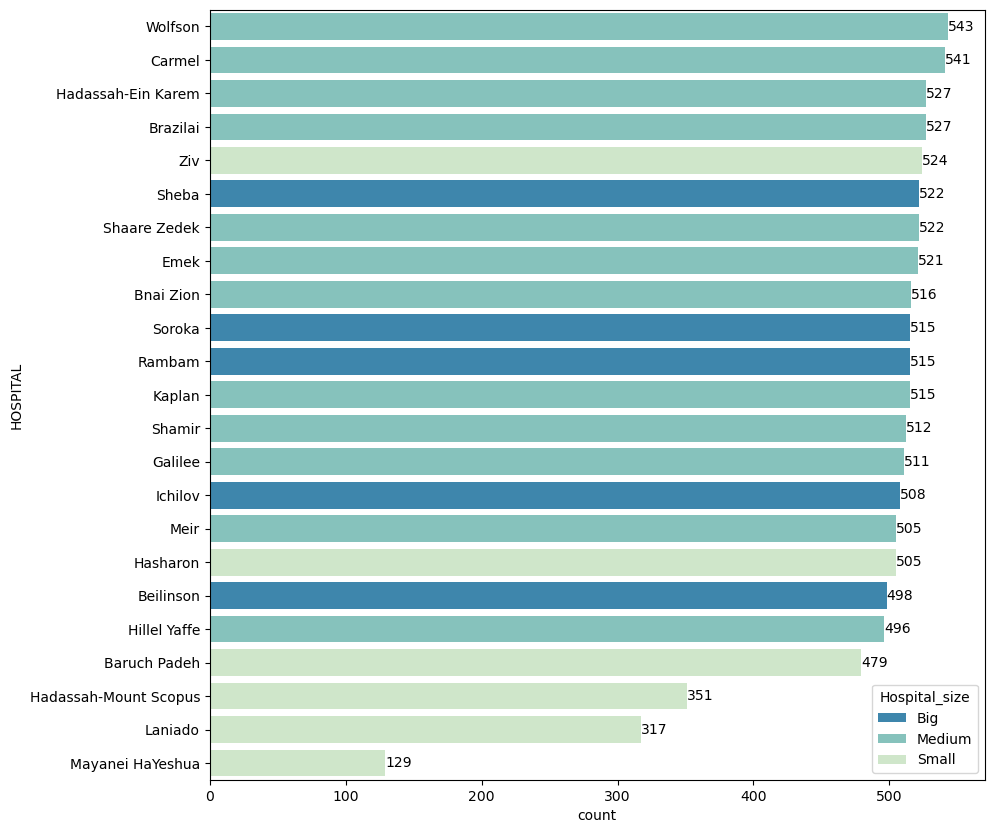

In [29]:
plt.figure(figsize=(10,10))
ax = sns.countplot(y=df["HOSPITAL"], hue=df['Hospital_size'], order = df['HOSPITAL'].value_counts().index, dodge=False, palette='GnBu_r');
for label in ax.containers:
    ax.bar_label(label);
ax

`Wolfson` and `Carmel` received the highest number of patients

### Q2.  How many male and female patients were treated?

M    6118
F    4981
Name: Gender, dtype: int64


C:\Users\hrith\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, '4981'), Text(0, 0, '6118')]

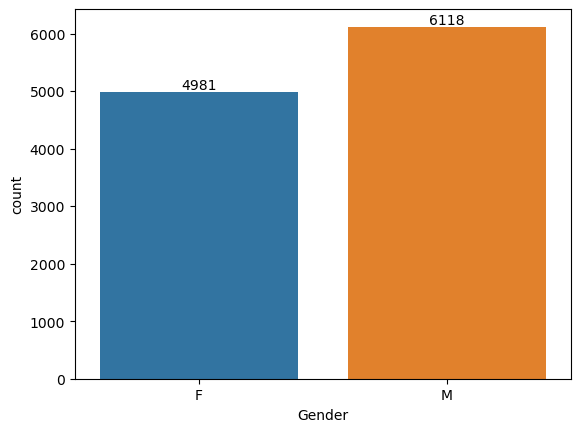

In [55]:
p = df['Gender'].value_counts()
print(p)
ax = sns.countplot(df.Gender)
ax.bar_label(ax.containers[0])

### Q3. What is the mean age of patients?

In [56]:
round(df['AGE_TODAY'].mean(),0)

58.0

### Q4. Which ward has more patients?

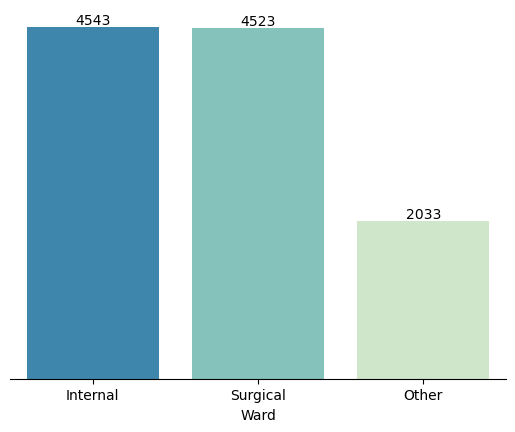

In [57]:
ax = sns.countplot(x=df['Ward'], palette='GnBu_r');
ax.bar_label(ax.containers[0]);
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

## Viz of answers to survey questions

**Q13 : To what extent did you feel that the staff treating you at the hospital knew your medical condition before hospitalization?**

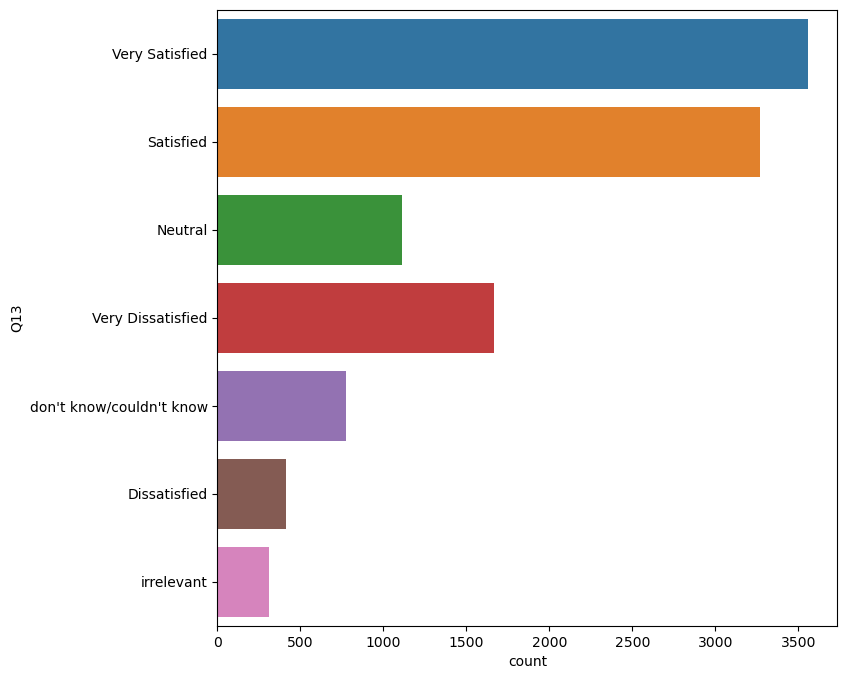

In [59]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q13']);

**Q4: If you were hospitalized through the emergency room, to what extent were you satisfied with the care you received?**

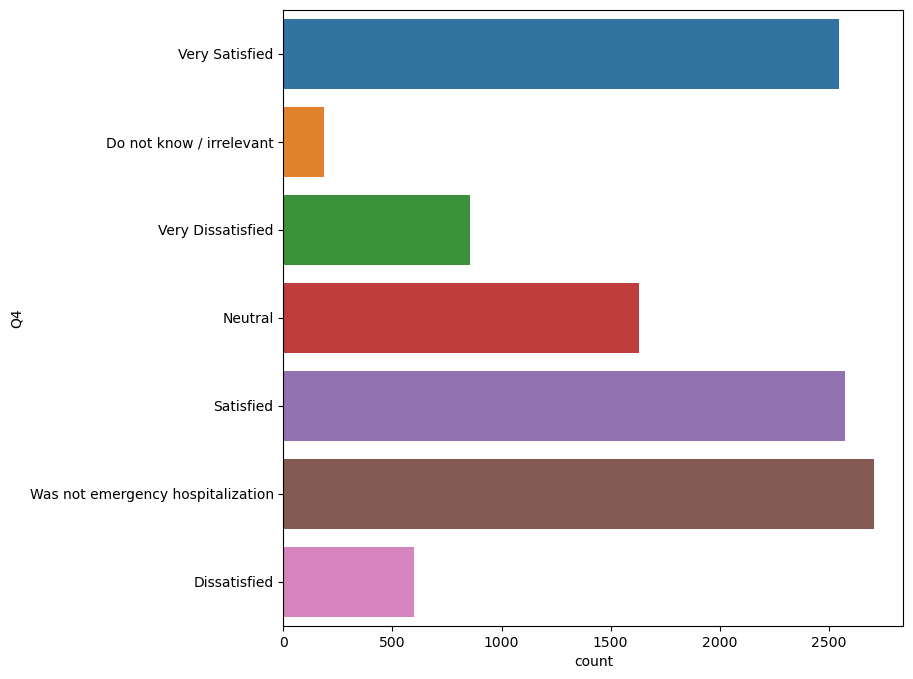

In [60]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q4']);

**Q9: During your last hospitalization, to what extent did you feel that the doctors treated you with kindness and respect?**

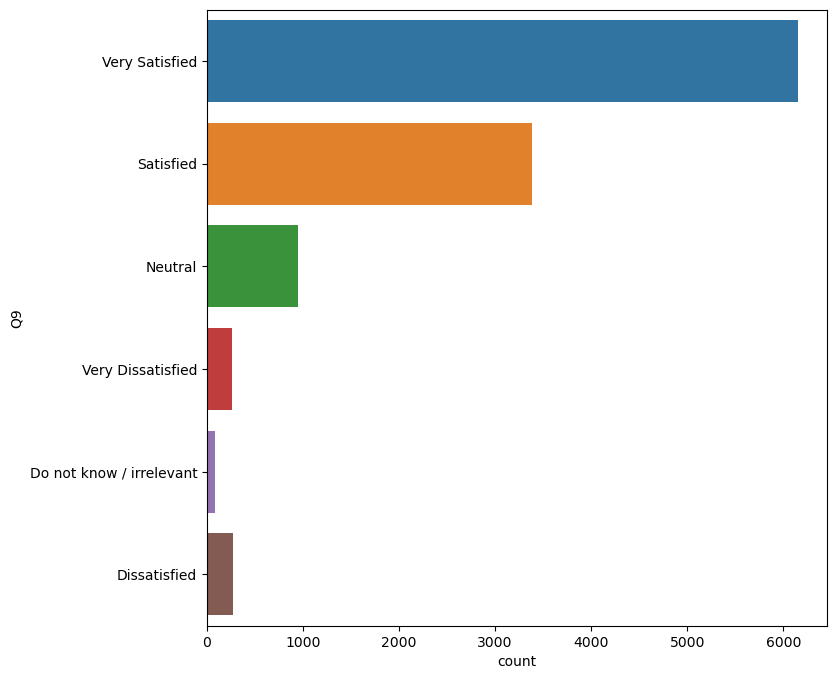

In [61]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q9']);

**Q19: To what extent did you feel that additional treatment methods / therapeutic alternatives were presented to you?**

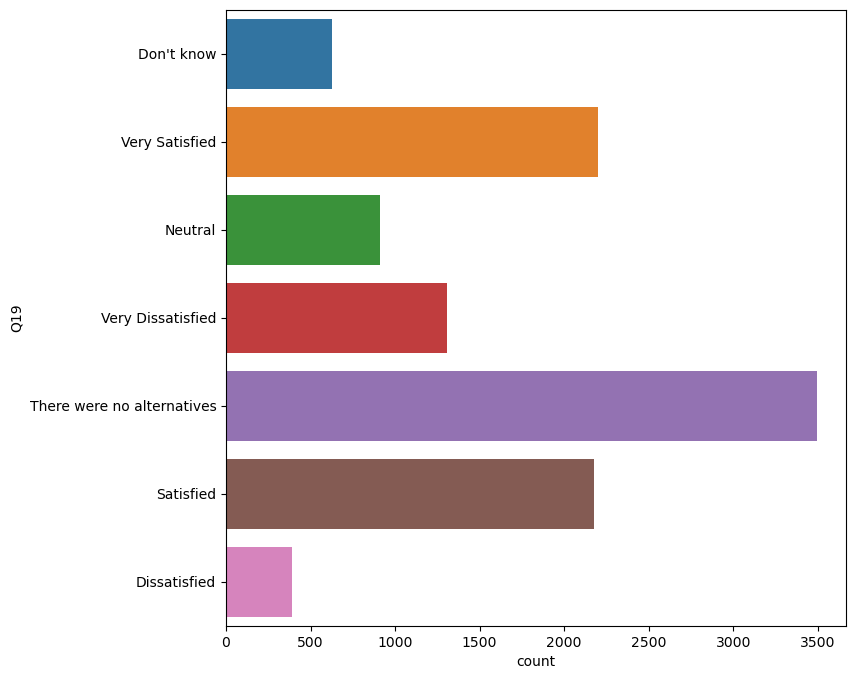

In [62]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q19']);

**Q21: To what extent did you feel that you received an answer to your requests and needs easily and without the need to make an effort?**

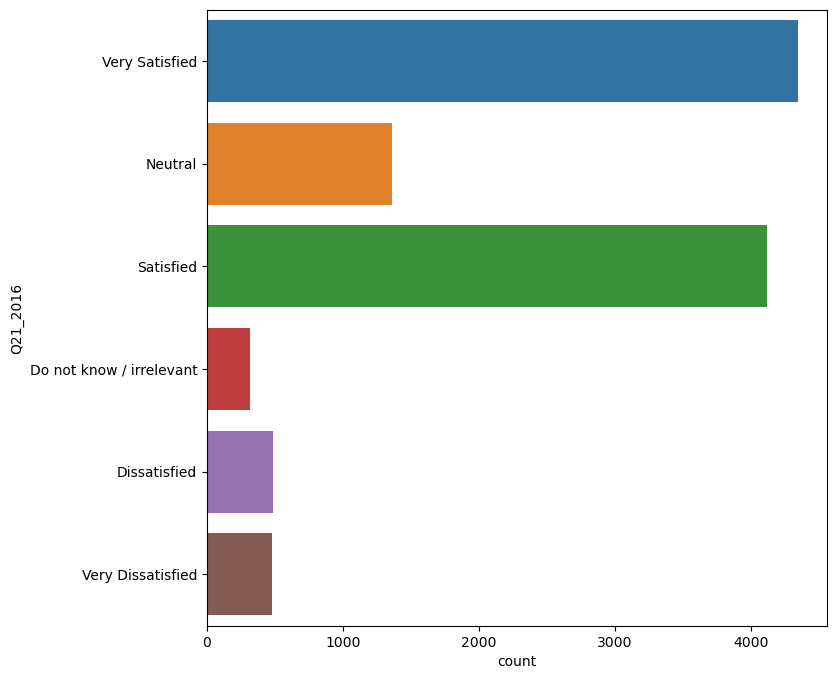

In [64]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q21_2016']);

**Q23: To what extent was the discharge process from the hospital conducted efficiently?**

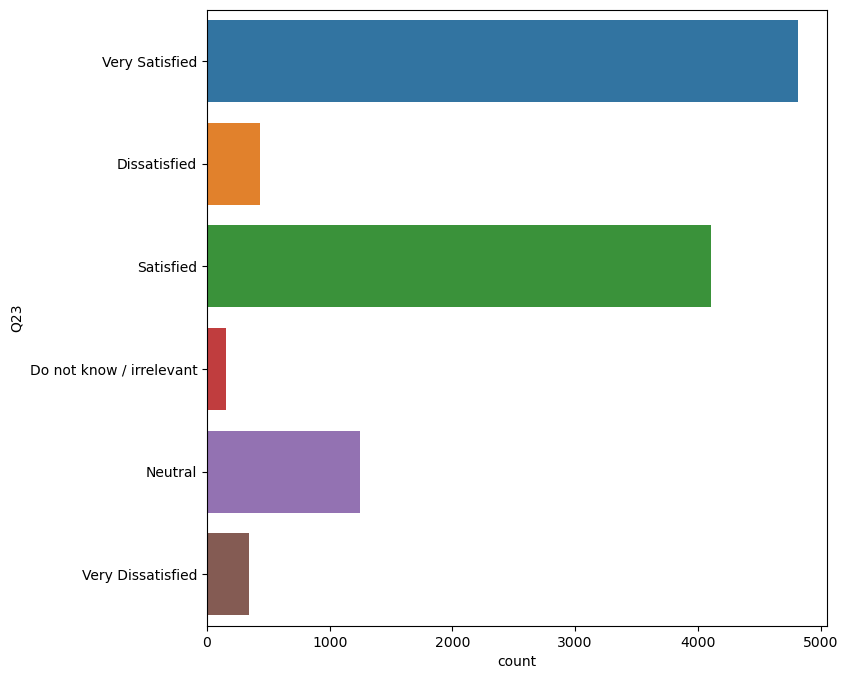

In [65]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q23']);

**Q27: To what extent are you satisfied with the conditions in the room where you were hospitalized?**

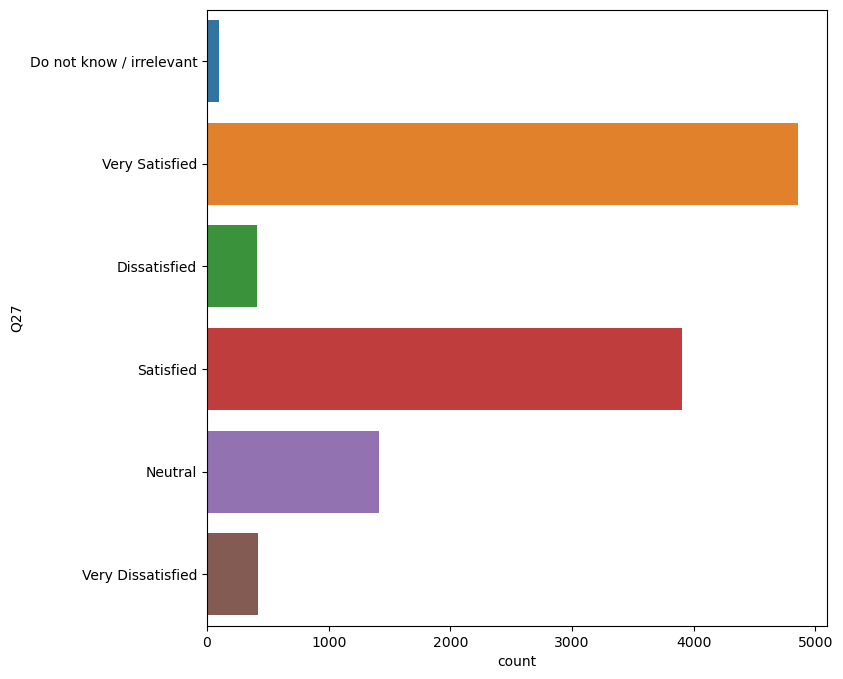

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(y=df['Q27']);

# 6. Conclusions

Based on our EDA we gain the following insights:

1. `Wolfson` and `Carmel` had the highest number of patients.
2. The average age of patients was 58 years.
3. 20% more male were admitted to the hospital compared to female.
4. Most of the patients were satisfied with the staff's knowledge but some patients were very unsatisfied.
5. In general, patients were satisfied with ER Care and treatment received by doctors
6. Majority of the patients were happy with the room conditions they were provided.